In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1

In [2]:
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)
print(np.shape(inputs))
print(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

(4, 2)
[[-1.    0.  ]
 [ 0.    0.25]
 [ 1.    1.  ]
 [ 1.   -1.  ]]
[[ 1.   -1.    0.  ]
 [ 1.    0.    0.25]
 [ 1.    1.    1.  ]
 [ 1.    1.   -1.  ]]
[-1  1  1 -1]


In [3]:
# One epoch of the perceptron algorithm.
def perceptron_epoch(inputs, labels, w, eta):
    mistakes = 0
    for x, y in zip(inputs, labels):
        # Sign function.
        y_hat = 1 if w.dot(x) >= 0 else -1
        if y_hat != y:
            mistakes += 1
            # Perceptron update.
            #w += eta * (y - y_hat) * x
            w += eta * y * x
    print("Mistakes: %d" % mistakes)
    return mistakes

In [4]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

Epoch 1
Mistakes: 3
[-1.    0.    1.25]


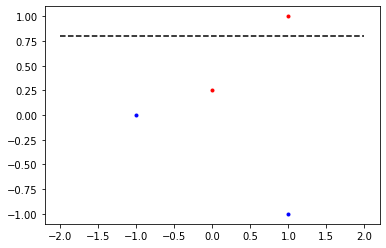

Epoch 2
Mistakes: 1
[0.  0.  1.5]


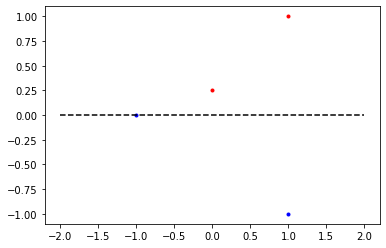

Epoch 3
Mistakes: 2
[0.   1.   1.75]


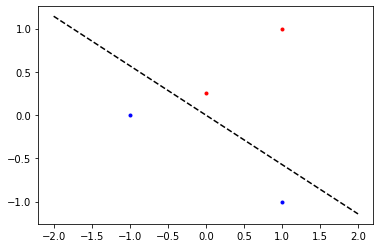

Epoch 4
Mistakes: 0
[0.   1.   1.75]


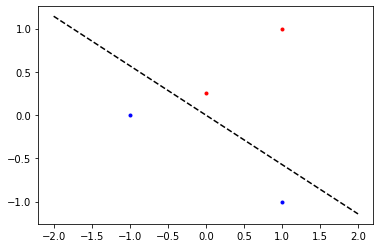

In [8]:
# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 5 epochs of perceptron.
#for epoch in range(5):

mistakes = 1
epoch = 1
while mistakes > 0 and epoch <= 10:
    print("Epoch %d" % epoch)
    mistakes= perceptron_epoch(inputs, labels, w, eta)
    print(w)
    plot_separation_line(inputs, labels, w)
    epoch += 1

### Question 1.3

Epoch 1
Mistakes: 21
[19.78655818 38.73373003 58.19674252]


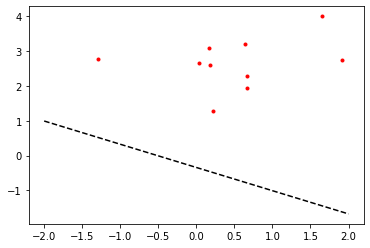

Epoch 2
Mistakes: 20
[ 39.78655818  76.10861349 114.38408977]


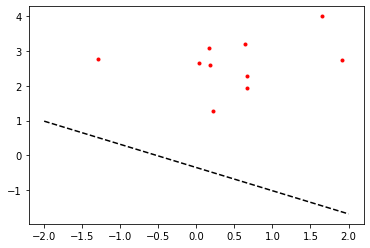

Epoch 3
Mistakes: 20
[ 59.78655818 113.48349694 170.57143701]


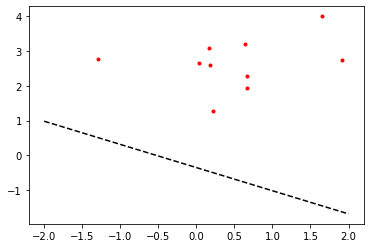

Epoch 4
Mistakes: 20
[ 79.78655818 150.8583804  226.75878426]


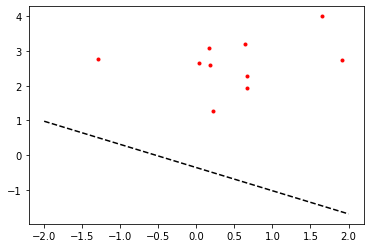

Epoch 5
Mistakes: 20
[ 99.78655818 188.23326386 282.9461315 ]


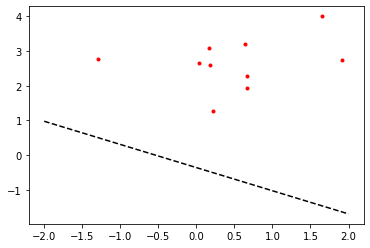

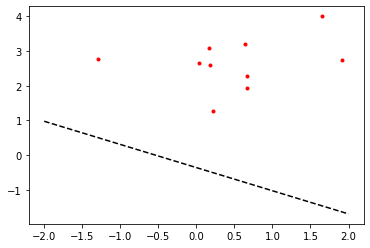

In [11]:
# Initialize weights randomly (including the bias)
w = np.random.randn(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 5 epochs of perceptron.
for epoch in range(5):
    print("Epoch %d" % (epoch + 1))
    perceptron_epoch(inputs, labels, w, eta)
    print(w)
    plot_separation_line(inputs, labels, w)

# Plot separation line.
plot_separation_line(inputs, labels, w)

### Question 2

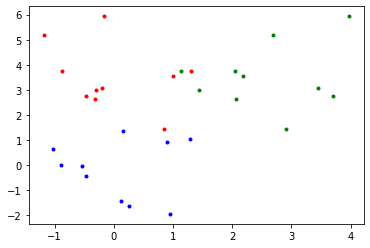

In [12]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)
inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)
labels = np.array([0]*10 + [1]*10 + [2]*10)
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels) + 1

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
plt.plot(inputs[labels == 2, 1], inputs[labels == 1, 2], "g.")


In [13]:
# One epoch of the multi-class perceptron algorithm.
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        # Sign function.
        y_hat = np.argmax(W.dot(x))
        if y_hat != y:
            mistakes += 1
            # Perceptron update.
            W[y, :] += eta * x
            W[y_hat, :] -= eta * x
    print("Mistakes: %d" % mistakes)

In [14]:
# Run classifier.
def multi_class_classify(inputs, W):
    predicted_labels = []
    for x in inputs:
        y_hat = np.argmax(W.dot(x))
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [15]:
# Compute accuracy of predicted labels.
def evaluate(predicted_labels, gold_labels):
    accuracy = np.mean(predicted_labels == gold_labels)
    return accuracy

Epoch 1
Mistakes: 14
Accuracy (training set): 0.733333

Epoch 2
Mistakes: 10
Accuracy (training set): 0.833333

Epoch 3
Mistakes: 5
Accuracy (training set): 0.900000

Epoch 4
Mistakes: 5
Accuracy (training set): 0.866667

Epoch 5
Mistakes: 8
Accuracy (training set): 0.833333

Epoch 6
Mistakes: 7
Accuracy (training set): 0.900000

Epoch 7
Mistakes: 9
Accuracy (training set): 0.866667

Epoch 8
Mistakes: 4
Accuracy (training set): 0.866667

Epoch 9
Mistakes: 6
Accuracy (training set): 0.833333

Epoch 10
Mistakes: 8
Accuracy (training set): 0.833333

Epoch 11
Mistakes: 4
Accuracy (training set): 0.866667

Epoch 12
Mistakes: 4
Accuracy (training set): 0.866667

Epoch 13
Mistakes: 6
Accuracy (training set): 0.833333

Epoch 14
Mistakes: 8
Accuracy (training set): 0.833333

Epoch 15
Mistakes: 3
Accuracy (training set): 0.833333

Epoch 16
Mistakes: 5
Accuracy (training set): 0.866667

Epoch 17
Mistakes: 7
Accuracy (training set): 0.866667

Epoch 18
Mistakes: 6
Accuracy (training set): 0.900000


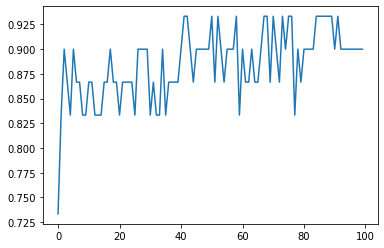

In [16]:
# Initialize all weights to 0 (including the bias)
W = np.zeros((num_labels, num_features+1))  # num_labels x (num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
accuracies = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))
    multi_class_perceptron_epoch(inputs, labels, W, eta)
    predicted_labels = multi_class_classify(inputs, W)
    accuracy = evaluate(predicted_labels, labels)
    print("Accuracy (training set): %f\n" % accuracy)
    accuracies.append(accuracy)
    
# Plot accuracies as a function of number of epochs.
plt.plot(range(100), accuracies)


### Question 3

In [17]:
# NOT
inputs = np.array([[-1], [1]])
labels = np.array([1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
for epoch in range(10):
    perceptron_epoch(inputs, labels, w, eta)
    print(w)

[[ 1. -1.]
 [ 1.  1.]]
[ 1 -1]
Mistakes: 1
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]


[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
[-1 -1 -1  1]
Mistakes: 1
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
Mistakes: 0
[-1.  1.  1.]


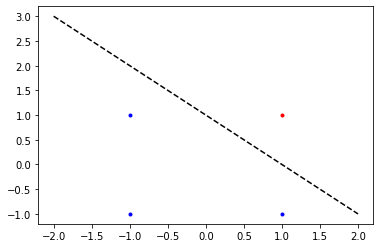

In [20]:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
labels = np.array([-1, -1, -1, 1])  # AND
#labels = np.array([-1, 1, 1, 1])  # OR
#labels = np.array([-1, 1, 1, -1])  # XOR

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
for epoch in range(10):
    perceptron_epoch(inputs, labels, w, eta)
    
print(w)    
plot_separation_line(inputs, labels, w)

### Question 4

In [21]:
from sklearn.datasets import load_digits
data = load_digits()

In [22]:
inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

print(data.DESCR)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ... 10.  0.  0.]
 [ 1.  0.  0. ... 16.  9.  0.]
 ...
 [ 1.  0.  0. ...  6.  0.  0.]
 [ 1.  0.  0. ... 12.  0.  0.]
 [ 1.  0.  0. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

<Figure size 432x288 with 0 Axes>

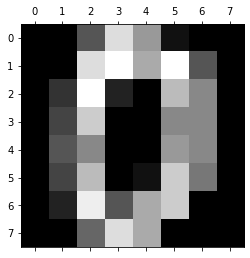

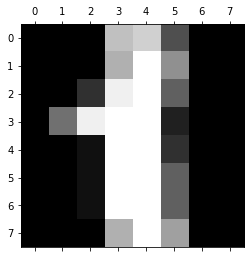

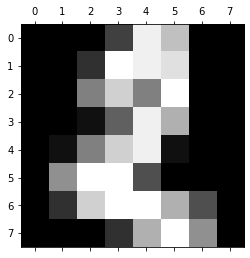

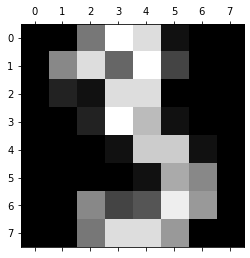

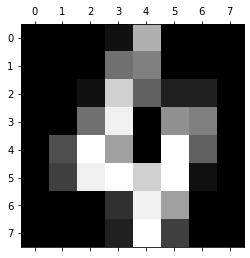

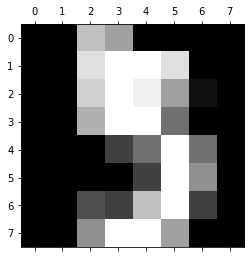

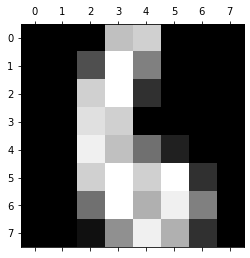

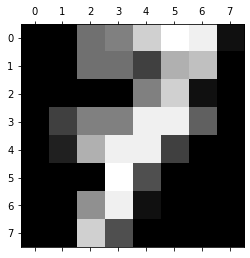

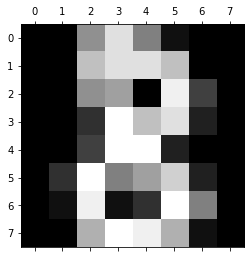

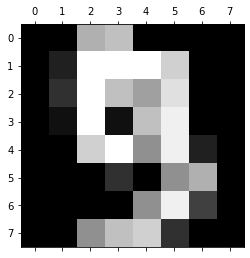

In [23]:
# Visualize image examples.
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(data.images[i])
plt.show()

In [29]:
# Split between train and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

Epoch 1
Mistakes: 329
Accuracy (training set): 0.888657
Accuracy (test set): 0.858333

Epoch 2
Mistakes: 161
Accuracy (training set): 0.937370
Accuracy (test set): 0.916667

Epoch 3
Mistakes: 120
Accuracy (training set): 0.956159
Accuracy (test set): 0.936111

Epoch 4
Mistakes: 91
Accuracy (training set): 0.866388
Accuracy (test set): 0.877778

Epoch 5
Mistakes: 89
Accuracy (training set): 0.941545
Accuracy (test set): 0.933333

Epoch 6
Mistakes: 82
Accuracy (training set): 0.947112
Accuracy (test set): 0.919444

Epoch 7
Mistakes: 73
Accuracy (training set): 0.961030
Accuracy (test set): 0.952778

Epoch 8
Mistakes: 80
Accuracy (training set): 0.951287
Accuracy (test set): 0.952778

Epoch 9
Mistakes: 83
Accuracy (training set): 0.934586
Accuracy (test set): 0.925000

Epoch 10
Mistakes: 74
Accuracy (training set): 0.974252
Accuracy (test set): 0.963889

Epoch 11
Mistakes: 52
Accuracy (training set): 0.949200
Accuracy (test set): 0.944444

Epoch 12
Mistakes: 66
Accuracy (training set): 0.

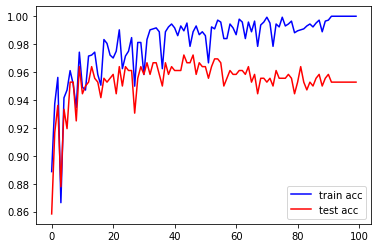

In [30]:
# Initialize all weights to 0 (including the bias)
W = np.zeros((num_labels, num_features+1))  # num_labels x (num_features + 1)

# Learning rate.
eta = 1  
    
# Run 100 epochs of perceptron.
train_accuracies = []
test_accuracies = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))

    # Run 1 epoch of training.
    multi_class_perceptron_epoch(X_train, y_train, W, eta)
    
    # Predict on training set and evaluate.
    predicted_labels = multi_class_classify(X_train, W)
    accuracy = evaluate(predicted_labels, y_train)
    print("Accuracy (training set): %f" % accuracy)
    train_accuracies.append(accuracy)
    
    # Predict on test set and evaluate.
    predicted_labels = multi_class_classify(X_test, W)
    accuracy = evaluate(predicted_labels, y_test)
    print("Accuracy (test set): %f\n" % accuracy)
    test_accuracies.append(accuracy)
    
# Plot train and test accuracies as a function of number of epochs.
plt.plot(range(100), train_accuracies, 'b-', label='train acc')
plt.plot(range(100), test_accuracies, 'r-', label='test acc')
plt.legend()
plt.show()


In [31]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
